<a href="https://colab.research.google.com/github/VaidehiBisen14/DEEPLEARNINGVaidehi/blob/main/PRAC_NO_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam


In [8]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
input_img = Input(shape=(28, 28, 1))

# --- Encoder ---
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)   # -> 7x7x64 compressed feature map

# --- Decoder ---
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Combine into model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

In [10]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=15,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 190s 796ms/step - loss: 0.3742 - val_loss: 0.2814
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 185s 789ms/step - loss: 0.2778 - val_loss: 0.2737
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 203s 792ms/step - loss: 0.2709 - val_loss: 0.2708
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 193s 821ms/step - loss: 0.2670 - val_loss: 0.2689
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 195s 829ms/step - loss: 0.2648 - val_loss: 0.2641
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 183s 778ms/step - loss: 0.2616 - val_loss: 0.2619
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 202s 778ms/step - loss: 0.2600 - val_loss: 0.2604
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 200s 770ms/step - loss: 0.2584 - val_loss: 0.2597
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 208s 795ms/step - loss: 0.2569 - val_loss: 0.2584
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 184s 781ms/step - loss: 0.2561 - val_loss: 0.2579
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 178s 759ms/step - loss: 0.2558 - val_loss: 0.2569
Epoch 12

In [12]:
# Get reconstructed outputs
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


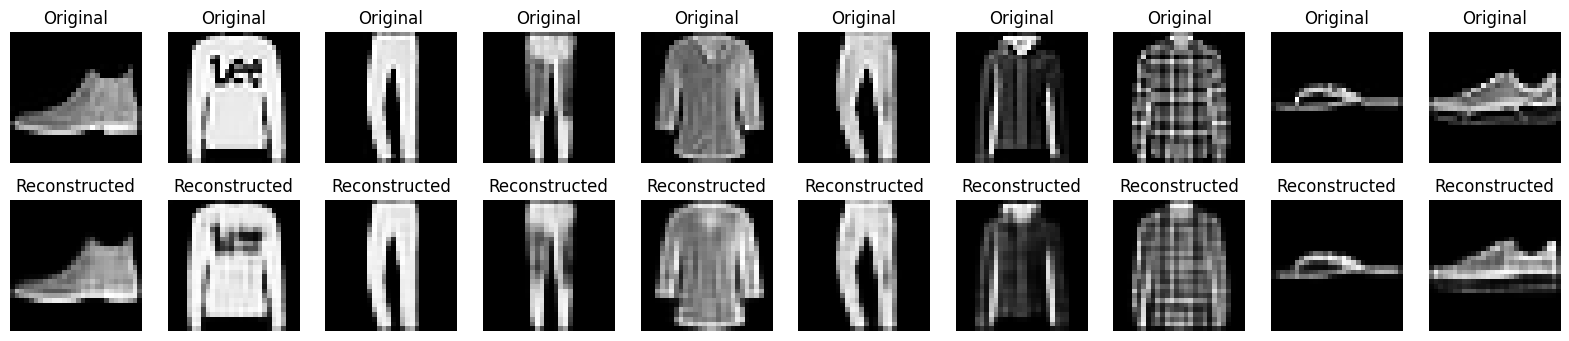

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [14]:

encoder = Model(input_img, encoded)
encoded_features = encoder.predict(x_test)
print("Encoded feature shape:", encoded_features.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Encoded feature shape: (10000, 7, 7, 64)
